<a href="https://colab.research.google.com/github/ShinAsakawa/ShinAsakawa.github.io/blob/master/notebooks/2021Kermack_McKendrick_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 疫学の数理モデルによる導入

- Date: 2021-0215
- Author: 浅川伸一 asakawa@ieee.org

<font color="gray">CoVID-19 の理解に向けて</font>

Kermack と McKendrick は 1905 年から 1906 年にかけてインドで発生したコレラの大流行についての疫学的流行モデルを提案した。

- $y$: population infected 感染者数
- $x$: number of individuals still unaffected 未感染者数
- $z$: number who have been removed by recover and death 地域社会から隔離された人口（理由は問わない，隔離，死去，免疫獲得など）
- $N$: population density 地域社会の総人口 $N=x+y+z$

$\kappa$ を感染率，$\ell$ を隔離係数として Kermack=McKendrick モデルは次式で表される:

$$
\begin{cases}
\frac{dx}{dt} &= - \kappa x y\\
\frac{dy}{dt} &= \kappa x y - \ell y\\
\frac{dz}{dt} &= \ell y
\end{cases}
$$

- Reference:
Kermack and McKendrick (1927) A Contribution to the Mathematical Theory of Epidemics.


In [ ]:
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 5.7MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp36-none-any.whl size=4120276 sha256=7b82b2b87fe75f89a49dba9719a6071fedd065ea1b89213d0ed80cb37361baf4
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [ ]:
!wget https://raw.githubusercontent.com/ShinAsakawa/ShinAsakawa.github.io/master/assets/1927Kermack_McKendrick_fig.png

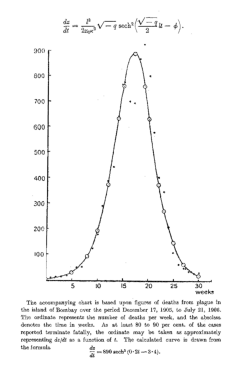

In [ ]:
import PIL.Image 
img = PIL.Image.open('1927Kermack_McKendrick_fig.png')

plt.figure(figsize=(4, 8))
plt.axis(False); plt.imshow(img)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38750 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24863 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26579 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 38750 missing from current font.
  font.set_

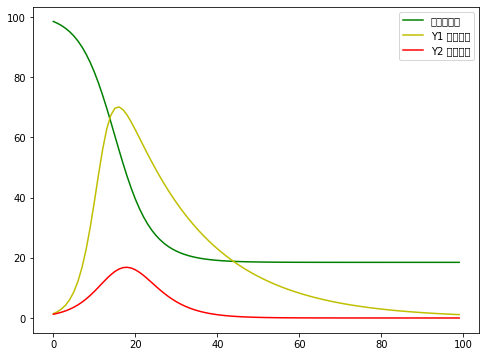

In [ ]:
def KM(x0=99, y0=1, length=100, kappa=1.0, ell=1.0, dt=0.005):
    """return Kermack and McKendrick models output"""

    X, Y = [], []
    x, y = x0, y0
    for _ in range(length):
        dx = (-kappa * x * y) * dt
        dy = (kappa * x * y - ell * y) * dt
        x += dx
        y += dy
        X.append(x)
        Y.append(y)

    return X, Y

kappa = 1.0
l1 = 10.
l2 = 50.

_, Y1 = KM(kappa=1.0, ell=l1, length=100)
X, Y2 = KM(kappa=1.0, ell=l2, length=100)
T = range(len(X))

plt.figure(figsize=(8,6))  # width, height inches
plt.plot(T, X, c='g', label='非感染者数')  # X軸を T, Y軸を X(非感染者) 色(c)を緑(g)で描画
plt.plot(T, Y1, c='y', label='Y1 感染者数')  # X軸を T, Y軸を Y1(感染者, l=l1) 色(c)を黄色(y)で描画
plt.plot(T, Y2, c='r', label='Y2 感染者数')  # X軸を T, Y軸を X2(感染者, l=l2) 色(c)を緑(r)で描画
plt.legend()
# plt.savefig('KM_model_output.png') グラフの保存

$\sinh(x) = \frac{\exp(x)-\exp(-x)}{2}$

$\cosh(x) = \frac{\exp(x)+\exp(-x)}{2}$

$\tanh(x) = \frac{\exp(x)-\exp(-x)}{\exp(x)+\exp(-x)}$

$\text{sech}(x) = \frac{1}{\cosh(x)}$

$\text{cosech}(x) = \frac{1}{\sinh(x)}$

$\coth(x) = \frac{\cosh(x)}{\sinh(x)}$


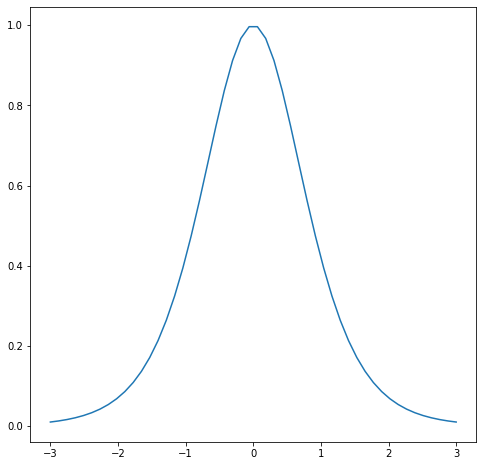

In [ ]:
x = np.linspace(-3,3)
plt.figure(figsize=(8,8))
plt.plot(x, 1/np.cosh(x) **2)